In [1]:
!cat /proc/cpuinfo

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [1]:
from urllib.request import urlretrieve
urlretrieve(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    "winequality-white.csv")

('winequality-white.csv', <http.client.HTTPMessage at 0x4171baa880>)

In [2]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# 데이터 읽어 들이기
import pandas as pd
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


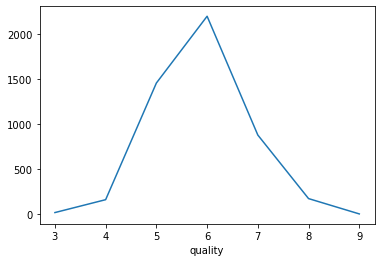

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# 와인 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# 품질 데이터별로 그룹을 나누고 수 세어보기
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

# 수를 그래프로 그리기
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
# 학습 전용과 테스트 전용으로 분리하기
y = wine["quality"]
x = wine.drop("quality", axis=1)

# 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 학습하기
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)

# 평가하기
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.5918367346938775


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

# 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# 학습 전용과 테스트 전용으로 분리하기
y = wine["quality"]
x = wine.drop("quality", axis=1)

# y 레이블 변경하기
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

# 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 학습하기
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 평가하기
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9428571428571428


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
import seaborn as sns

# 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
# 학습 전용과 테스트 전용으로 분리하기
y = wine["quality"]
x = wine.drop("quality", axis=1)

# 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 학습하기
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 평가하기
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

# 결과를 그림으로 출력하기
corr = wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

ModuleNotFoundError: No module named 'mlxtend'

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

# 데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
# 학습 전용과 테스트 전용으로 분리하기
y = wine["quality"]
x = wine.drop("quality", axis=1)

# y 레이블 변경하기
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

# 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 학습하기
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 평가하기
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9530612244897959


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

y = wine["quality"]
x = wine.drop("quality", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.15      0.23        33
           5       0.71      0.66      0.69       294
           6       0.66      0.82      0.73       446
           7       0.74      0.54      0.62       179
           8       0.92      0.42      0.58        26

    accuracy                           0.69       980
   macro avg       0.59      0.43      0.48       980
weighted avg       0.69      0.69      0.68       980

정답률= 0.686734693877551


C:\Users\Moribito\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Moribito\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Moribito\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
in_file="data.csv"
out_file="tem10y.csv"

with open(in_file,"rt",encoding="EUC_KR") as fr:
    lines=fr.readlines()
    
lines=["연,월,일,기온,품질,균질\n"]+lines[5:]
lines=map(lambda v:v.replace('/',','),lines)
result="".join(lines).strip()
print(result)

with open(out_file,"wt",encoding="utf-8") as fw:
    fw.write(result)
    print("saved.")

연,월,일,기온,품질,균질
2006,1,1,3.6,8,1
2006,1,2,4,8,1
2006,1,3,3.7,8,1
2006,1,4,4,8,1
2006,1,5,3.6,8,1
2006,1,6,2.1,8,1
2006,1,7,2.8,8,1
2006,1,8,4.2,8,1
2006,1,9,3.7,8,1
2006,1,10,4.3,8,1
2006,1,11,6.1,8,1
2006,1,12,6.1,8,1
2006,1,13,4,8,1
2006,1,14,6.6,8,1
2006,1,15,10.7,8,1
2006,1,16,9,8,1
2006,1,17,8,8,1
2006,1,18,5.6,8,1
2006,1,19,4.2,8,1
2006,1,20,4,8,1
2006,1,21,1.3,8,1
2006,1,22,3.1,8,1
2006,1,23,2.5,8,1
2006,1,24,4.4,8,1
2006,1,25,5.5,8,1
2006,1,26,6,8,1
2006,1,27,6.8,8,1
2006,1,28,5.5,8,1
2006,1,29,6,8,1
2006,1,30,8.4,8,1
2006,1,31,7.1,8,1
2006,2,1,5.7,8,1
2006,2,2,7.8,8,1
2006,2,3,6,8,1
2006,2,4,1.6,8,1
2006,2,5,1.9,8,1
2006,2,6,2,8,1
2006,2,7,3.6,8,1
2006,2,8,7.9,8,1
2006,2,9,4.6,8,1
2006,2,10,5.6,8,1
2006,2,11,7.5,8,1
2006,2,12,4.6,8,1
2006,2,13,5.7,8,1
2006,2,14,10.5,8,1
2006,2,15,14.1,8,1
2006,2,16,7.5,8,1
2006,2,17,7,8,1
2006,2,18,4.4,8,1
2006,2,19,7,8,1
2006,2,20,6.4,8,1
2006,2,21,8,8,1
2006,2,22,10.8,8,1
2006,2,23,11.2,8,1
2006,2,24,6.5,8,1
2006,2,25,7.8,8,1
2006,2,26,7.5,8,

In [17]:
import pandas as pd

df=pd.read_csv("tem10y.csv",encoding="utf-8")

md={}
for i,row in df.iterrows():
    m,d,v=(int(row['월']),int(row['일']),float(row['기온']))
    key=str(m)+"/"+str(d)
    if not(key in md):md[key]=[]
    md[key]+=[v]
        
avs={}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key,v))

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

In [18]:
avs["11/3"]

15.48181818181818

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("tem10y.csv",encoding="utf-8")

g=df.groupby(['월'])['기온']
gg=g.sum()/g.count()

print(gg)
# gg.plot()
# plt.savefig("tem-month-avg.png")
# plt.show()

월
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 기온, dtype: float64


C:\Users\Moribito\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Moribito\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


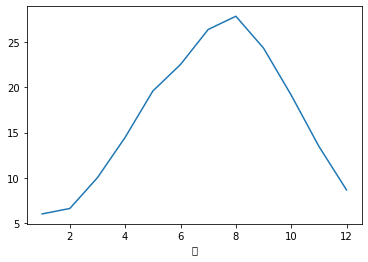

In [21]:
gg.plot()
plt.savefig("tem-month-avg.png")
plt.show()

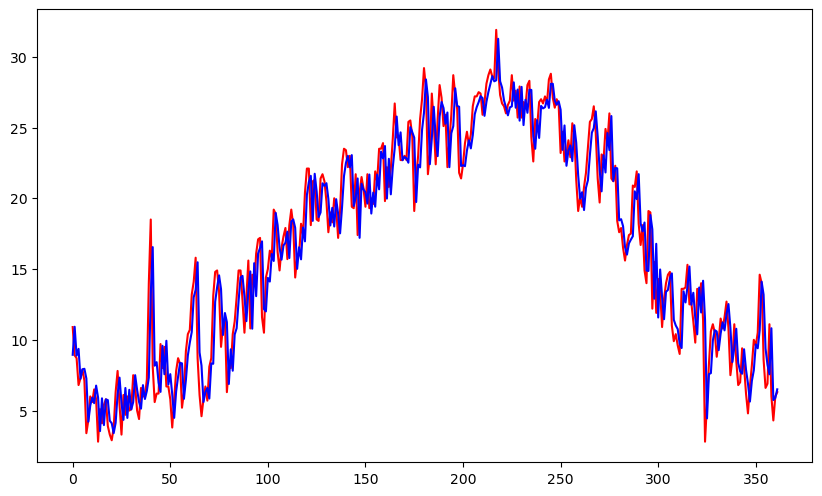

In [22]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('tem10y.csv', encoding="utf-8")

interval = 3
train_year = (df["연"] <= 2015)
test_year = (df["연"] >= 2016)

def make_data(data):
    x = []
    y = []
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i <= interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 학습하기
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 학습하기
pre_y = lr.predict(test_x) # 예측하기

# 결과를 그래프로 그리기
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()